In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# df['Datetime'] = pd.to_datetime(df['Datetime'])
# df['Datetime'] = df['Datetime'].apply(lambda x: x.replace(year = 2007))

In [2]:
myhtm = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
memory_csv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent memory.csv")

In [3]:
memory_csv.count

<bound method DataFrame.count of Empty DataFrame
Columns: [Unnamed: 0, state_prev, action, next_reward, next_state, game_over]
Index: []>

In [4]:
memory_csv.head()
print(list(memory_csv.at[1, 'action'])[1:].index('1') / 4)
print(list(memory_csv.at[1, 'action']))
print(list(memory_csv.at[1, 'action'])[1:])
# print([int(each) for each in list(memory_csv.at[1, 'action']) if int(each).dtype == int])
action_index = [list(memory_csv.at[x, 'action'])[1:].index('1') / 3 for x in range(memory_csv['action'].count())]
print(action_index)
rewards = memory_csv['next_reward'].convert_dtypes()

y2 = memory_csv['next_reward']
y1 = action_index
x = [x for x in range(len(y1))]

plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2)

# plt.show()

KeyError: 1

In [6]:
# MJ_m2 = myhtm['Annual_Building_Utility_Performance_Summary_for_Entire_Facility']['Site and Source Energy'].iat[0,1]
MJ_m2 = myhtm[0][2][1]
EUI_kWh_m2 = float(MJ_m2) * 0.2777777 #conversion from MJ to kWh
print(MJ_m2)
print(EUI_kWh_m2)

113.18
31.438880086000005


# Agent Loss

In [7]:
lossdf = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent loss.csv")

In [8]:
rollloss = lossdf['0'].rolling(20).mean().plot()
# rollloss.plot()
# rolling(702, min_periods=1, center=True).mean()

KeyError: '0'

In [10]:
dfcsv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusout.csv", parse_dates=['Date/Time'])

In [11]:
dfcsv.columns

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
       'Z1_GROUND_FLOOR:Zone People Total Heating Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone People Total Heating Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)',
       'Solar Enclosure 1:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Mean Air Temperature [C](Hourly)',
       'Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Mean Air Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Operative Temperatu

<Axes: >

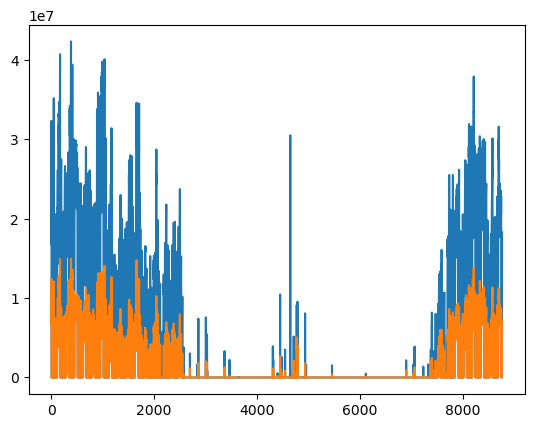

In [12]:
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().plot()
dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().plot()
dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().plot()
# newdf = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna() - dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna()
# dfcsv['Whole Building:Facility Total Purchased Electricity Energy [J](Hourly)'].dropna().plot()
# newdf.plot()

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'



<Axes: >

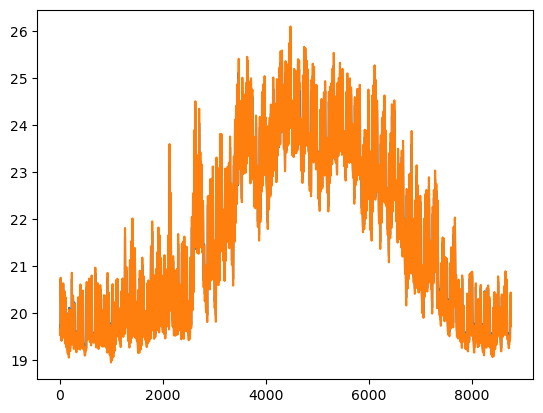

In [13]:
dfcsv['Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly)'].dropna().plot()
dfcsv['Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)'].dropna().plot()

In [14]:
totalmj = float(MJ_m2) * 2480
totaljoules = totalmj * 1000000

z1sum = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()
z2sum = dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()

print(totalmj)
print(totaljoules)
print(z1sum)
print(z2sum)
print((z2sum + z1sum) / 1000000000, '  total')

print('\nsame as above, for ease')
print(MJ_m2)
print(EUI_kWh_m2)


280686.4
280686400000.0
39437110929.03003
13518462974.72491
52.955573903754946   total

same as above, for ease
113.18
31.438880086000005


# Meter CSV

In [15]:
dfmeter = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusmtr.csv")

<Axes: >

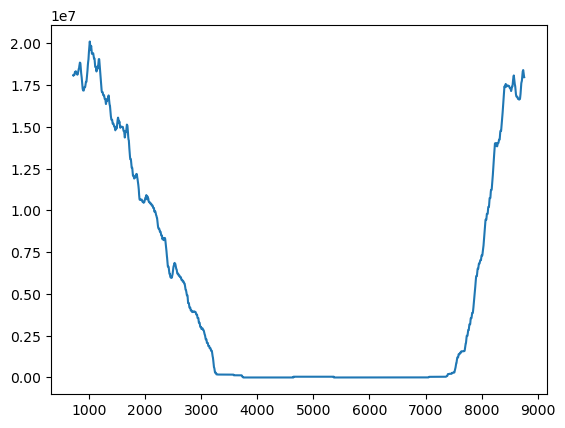

In [16]:
dfmeter['DistrictHeating:Facility [J](TimeStep)'].rolling(720).mean().plot()

In [17]:
import matplotlib.pyplot as plt

# x1 = [2,4,6,8]
# x2 = [3,5,7,9]
# x = [x for x in range(72)]
# y2 = output_df["DistrictHeating:Facility [J](TimeStep)"]
# y2=y4
# y2 = y2.rolling(702, min_periods=1, center=True).mean()

y1 = df["electricity_facility"]
y2 = df["electricity_heating"]
y2 = y2.rolling(24, min_periods=1, center=True).mean()
x = [x for x in range(y2.count())]

plt.figure(figsize=(10,6))
# plt.plot(x,y1)
plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)
# plt.plot(x, list(reversed(booleanlist_school_active)))

plt.show()

NameError: name 'df' is not defined

In [18]:
from eppy import modeleditor
from eppy.modeleditor import IDF
iddfile = r"C:\EnergyPlusV22-2-0\Energy+.idd"
fname1 = r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\test_files\Base_model simple schedule.idf"
IDF.setiddname(iddfile)
idf1 = IDF(fname1)

In [34]:
print(idf1.idfobjects['RUNPERIOD'][0].Begin_Year)
idf1.idfobjects['RUNPERIOD'][0].End_Year = idf1.idfobjects['RUNPERIOD'][0].Begin_Year + 2
print(idf1.idfobjects['RUNPERIOD'][0].End_Year)

print(idf1.idfobjects['RUNPERIOD'][0])

# idf1.save()

2007.0
2009.0

RunPeriod,
    Run Period 1,             !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    2007,                     !- Begin Year
    12,                       !- End Month
    31,                       !- End Day of Month
    2009,                     !- End Year
    Monday,                   !- Day of Week for Start Day
    No,                       !- Use Weather File Holidays and Special Days
    No,                       !- Use Weather File Daylight Saving Period
    No,                       !- Apply Weekend Holiday Rule
    Yes,                      !- Use Weather File Rain Indicators
    Yes,                      !- Use Weather File Snow Indicators
    No;                       !- Treat Weather as Actual

